In [19]:
import pandas as pd

In [20]:
# set measurement levels
col_types = {'chain': 'object',
             'offer': 'object',
             'market': 'object',
             'category': 'object',
             'company': 'object',
             'brand': 'object',
             'exact_item_bought': 'object'}

In [21]:
# read data created from SAS key
train_pd = pd.read_csv('datasets/assign_05_train.csv', dtype=col_types)
valid_pd = pd.read_csv('datasets/assign_05_valid.csv', dtype=col_types)
test_pd = pd.read_csv('datasets/assign_05_test.csv', dtype=col_types)

In [22]:
# start and import h2o
# set seed
import h2o
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

SEED = 12345

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 12 hours 17 mins
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.3
H2O cluster version age:,2 months and 11 days
H2O cluster name:,kaiyuanluo
H2O cluster total nodes:,1
H2O cluster free memory:,1.038 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [24]:
train.columns.values

AttributeError: 'list' object has no attribute 'values'

In [52]:
# enforce same measurement levels in h2o and pandas
col_types = {'chain': 'enum',
             'offer': 'enum',
             'market': 'enum',
             'category': 'enum',
             'company': 'enum',
             'brand': 'enum',
             'exact_item_bought': 'enum'}

train = h2o.H2OFrame(train_pd, column_types=col_types)
valid = h2o.H2OFrame(valid_pd, column_types=col_types)
test = h2o.H2OFrame(test_pd, column_types=col_types)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [26]:
# look at training data
train.describe()

Rows:64122
Cols:18




,id,chain,offer,market,repeater,offerdate,category,quantity,company,offervalue,brand,avg_category_quantity,avg_category_amount,exact_item_bought,month,week,dayOfWeek,day
type,int,enum,enum,enum,int,int,enum,int,enum,real,enum,real,real,enum,int,int,enum,int
mins,86246.0,,,,0.0,1362096000000.0,,1.0,,0.75,,-1.0,-85.14,,3.0,9.0,,1.0
mean,1865046990.7057755,,,,0.2693771248557437,1365226057677.5486,,1.0,,1.2553569757649437,,0.6942286652419983,2.2440281205381525,,3.58702161504631,14.372602227004732,,19.029849349677207
maxs,4809911000.0,,,,1.0,1367280000000.0,,1.0,,3.0,,44.181818182,60.802,,4.0,18.0,,31.0
sigma,1567329467.998469,,,,0.4436396723261261,1304850779.3860927,,0.0,,0.5238038613432835,,0.7714497289290279,2.631968000178957,,0.49237284581128055,2.163732658694185,,9.628506814875887
zeros,0,,,,46849,0,,0,,0,,29124,29138,,0,0,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,86246.0,205,1208251,34,1.0,1366761600000.0,2202,1.0,104460040,2.0,3718,0.0,0.0,0,4.0,17.0,Wed,24.0
1,12682470.0,18,unknown,11,0.0,1364428800000.0,unknown,1.0,unknown,0.75,unknown,1.0,2.5,1,3.0,13.0,Thu,28.0
2,13807224.0,4,1204576,1,0.0,1365120000000.0,5616,1.0,104610040,1.0,15889,1.4375,3.365,1,4.0,14.0,Fri,5.0


In [78]:
# look at test data
valid.describe()

Rows:47980
Cols:18




,id,chain,offer,market,repeater,offerdate,category,quantity,company,offervalue,brand,avg_category_quantity,avg_category_amount,exact_item_bought,month,week,dayOfWeek,day
type,string,enum,enum,enum,int,int,enum,int,enum,real,enum,real,real,enum,int,int,enum,int
mins,NaN,,,,0.0,1362096000000.0,,1.0,,0.75,,-1.0,-17.92,,3.0,9.0,,1.0
mean,NaN,,,,0.27067528136723634,1365220413438.94,,1.0,,1.2537098791163064,,0.6987578430317867,2.2474069631412052,,3.586515214672795,14.36317215506458,,18.980220925385513
maxs,NaN,,,,1.0,1367280000000.0,,1.0,,3.0,,15.282051282,47.84,,4.0,18.0,,31.0
sigma,NaN,,,,0.44431327679470606,1301145131.3951943,,0.0,,0.5237828342755788,,0.7514675562376236,2.560849796384917,,0.49246337147019814,2.158088126819009,,9.63523246287535
zeros,0,,,,34993,0,,0,,0,,21610,21622,,0,0,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,86252,205,unknown,34,1.0,1364342400000.0,unknown,1.0,unknown,0.75,unknown,1.0,2.425,1,3.0,13.0,Wed,27.0
1,13089312,15,1204821,9,0.0,1364774400000.0,5619,1.0,107717272,1.5,102504,0.0,0.0,0,4.0,14.0,Mon,1.0
2,13179265,14,unknown,8,0.0,1364515200000.0,unknown,1.0,unknown,0.75,unknown,0.0,0.0,0,3.0,13.0,Fri,29.0


In [30]:
test.describe()

Rows:47955
Cols:18




,id,chain,offer,market,repeater,offerdate,category,quantity,company,offervalue,brand,avg_category_quantity,avg_category_amount,exact_item_bought,month,week,dayOfWeek,day
type,int,enum,enum,enum,int,int,enum,int,enum,real,enum,real,real,enum,int,int,enum,int
mins,12996040.0,,,,0.0,1362096000000.0,,1.0,,0.75,,0.0,-9.37,,3.0,9.0,,1.0
mean,1867490399.1374826,,,,0.274799291001981,1365213666212.0706,,1.0,,1.2568918778021017,,0.6922712485092447,2.240991812359233,,3.5835262225002578,14.351621311646321,,18.99478677927232
maxs,4715039820.0,,,,1.0,1367280000000.0,,1.0,,3.0,,20.421052632,62.218,,4.0,18.0,,31.0
sigma,1572233235.244931,,,,0.4464177375650823,1305008185.5380197,,0.0,,0.5266314909371272,,0.7560849322807945,2.5924104633546685,,0.492979145601919,2.164334199005023,,9.636575746788571
zeros,0,,,,34777,0,,0,,0,,21815,21831,,0,0,,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,12996040.0,15,unknown,9,0.0,1364169600000.0,unknown,1.0,unknown,0.75,unknown,0.0,0.0,0,3.0,13.0,Mon,25.0
1,13540129.0,14,1200581,8,0.0,1364601600000.0,1726,1.0,104460040,1.25,7668,1.3333333333,4.6533333333,1,3.0,13.0,Sat,30.0
2,13873775.0,4,unknown,1,0.0,1364256000000.0,unknown,1.0,unknown,0.75,unknown,0.0,0.0,0,3.0,13.0,Tue,26.0


In [65]:
# quantity unary, drop it
# drop other unusable variables
# set modeling roles
drops = ['id', 'chain', 'market', 'offerdate', 'quantity']
y = 'repeater'
X = [name for name in train.columns if name not in [y] + drops]
print(y)
print(X)

repeater
['offer', 'category', 'company', 'offervalue', 'brand', 'avg_category_quantity', 'avg_category_amount', 'exact_item_bought', 'month', 'week', 'dayOfWeek', 'day', 'market_te', 'chain_te']


In [9]:
train.shape

(64122, 18)

In [71]:
# check shape 
valid.shape

(47980, 18)

In [72]:
# check shape 
test.shape

(47955, 18)

In [66]:
# quantity unary, drop it
# drop other unusable variables
# set modeling roles
drops = ['id', 'chain', 'market', 'offerdate', 'quantity']
y = 'repeater'
X = [name for name in train.columns if name not in [y] + drops]
print(y)
print(X)

repeater
['offer', 'category', 'company', 'offervalue', 'brand', 'avg_category_quantity', 'avg_category_amount', 'exact_item_bought', 'month', 'week', 'dayOfWeek', 'day', 'market_te', 'chain_te']


In [60]:
from h2o.targetencoder import TargetEncoder

te_ = TargetEncoder(x=e_columns, y=y)
_ = te_.fit(train)
train = te_.transform(frame=train, holdout_type='loo', seed=12345)
valid = te_.transform(frame=valid, holdout_type='loo', seed=12345)
test = te_.transform(frame=test, holdout_type='loo', seed=12345)

In [67]:
# define random grid search parameters
from h2o.estimators.gbm import H2OGradientBoostingEstimator 
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch
hyper_parameters = {'ntrees':list(range(0, 500, 50)),
                    'max_depth':list(range(1, 22, 2)),
                    'sample_rate':[s/float(10) for s in range(1, 11)],
                    'col_sample_rate':[s/float(10) for s in range(1, 11)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':50,
                  'seed' : 12345}

# initialize grid search
gsearch = H2OGridSearch(H2OGradientBoostingEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [68]:
# show grid search results
gsearch.show()

# select best model
gbm_model = gsearch.get_grid()[0]

# print model information
gbm_model

     col_sample_rate max_depth ntrees sample_rate  \
0                0.8         5    200         0.6   
1                0.1         7    400         0.7   
2                0.7         3    100         0.6   
3                0.1        19    350         0.6   
4                0.1        19    300         0.5   
5                0.9         5    400         0.4   
6                0.7        11    250         1.0   
7                1.0         9     50         0.3   
8                0.9        11     50         0.7   
9                0.1         7    350         0.1   
10               0.5         1    450         0.2   
11               0.2         9    350         0.5   
12               0.9         1    350         0.4   
13               0.9         1    350         0.3   
14               0.4         1    350         1.0   
15               1.0         9    450         0.5   
16               0.4         1    250         0.9   
17               0.1         1    400         

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2768362296389777: 


,0,1,Error,Rate
0,31027.0,15822.0,0.3377,(15822.0/46849.0)
1,5400.0,11873.0,0.3126,(5400.0/17273.0)
Total,36427.0,27695.0,0.331,(21222.0/64122.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2768362,0.5280644,227.0
max f2,0.1549110,0.6811598,319.0
max f0point5,0.4083359,0.5014170,139.0
max accuracy,0.4695094,0.7576807,107.0
max precision,0.9214808,1.0,0.0
max recall,0.0314739,1.0,396.0
max specificity,0.9214808,1.0,0.0
max absolute_mcc,0.3013240,0.3157338,211.0
max min_per_class_accuracy,0.2826678,0.6731627,223.0
max mean_per_class_accuracy,0.2768362,0.6748250,227.0


Gains/Lift Table: Avg response rate: 26.94 %, avg score: 26.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100122,0.6602327,3.2496798,3.2496798,0.8753894,0.7175332,0.8753894,0.7175332,0.0325363,0.0325363,224.9679826,224.9679826
,2,0.0200087,0.6103331,2.9072674,3.0786070,0.7831513,0.6334870,0.8293063,0.6755428,0.0290627,0.0615990,190.7267373,207.8607041
,3,0.0300053,0.5796044,2.5250370,2.8941796,0.6801872,0.5936268,0.7796258,0.6482517,0.0252417,0.0868407,152.5037001,189.4179601
,4,0.0400019,0.5583355,2.3339218,2.7541698,0.6287051,0.5691329,0.7419103,0.6284797,0.0233312,0.1101719,133.3921815,175.4169760
,5,0.0500140,0.5407231,2.2030748,2.6438477,0.5934579,0.5496540,0.7121921,0.6126998,0.0220575,0.1322295,120.3074757,164.3847655
,6,0.1000125,0.4774046,2.0645581,2.3542480,0.5561447,0.5071138,0.6341806,0.5599150,0.1032247,0.2354542,106.4558113,135.4248049
,7,0.1500109,0.4321115,1.7125527,2.1403718,0.4613225,0.4545198,0.5765672,0.5247869,0.0856250,0.3210791,71.2552692,114.0371834
,8,0.2000094,0.3914884,1.5180234,1.9847969,0.4089208,0.4109893,0.5346589,0.4963397,0.0758988,0.3969779,51.8023380,98.4796852
,9,0.3000062,0.3390130,1.3709685,1.7801980,0.3693075,0.3641612,0.4795446,0.4522825,0.1370926,0.5340705,37.0968483,78.0198032
,10,0.4000031,0.2929321,1.1978606,1.6346193,0.3226762,0.3163529,0.4403291,0.4183014,0.1197823,0.6538528,19.7860554,63.4619339




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.17840365381264894
RMSE: 0.42237856694279474
LogLoss: 0.5348171155045771
Mean Per-Class Error: 0.35657205251124036
AUC: 0.6961542590668416
pr_auc: 0.4519121176567889
Gini: 0.39230851813368317
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24739189410194337: 


,0,1,Error,Rate
0,20505.0,14488.0,0.414,(14488.0/34993.0)
1,3889.0,9098.0,0.2995,(3889.0/12987.0)
Total,24394.0,23586.0,0.383,(18377.0/47980.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2473919,0.4975255,243.0
max f2,0.1236777,0.6679492,338.0
max f0point5,0.3914289,0.4568855,145.0
max accuracy,0.4905204,0.7397666,92.0
max precision,0.8989479,1.0,0.0
max recall,0.0238198,1.0,398.0
max specificity,0.8989479,1.0,0.0
max absolute_mcc,0.2850433,0.2564392,218.0
max min_per_class_accuracy,0.2766002,0.6422576,223.0
max mean_per_class_accuracy,0.2561477,0.6434279,237.0


Gains/Lift Table: Avg response rate: 27.07 %, avg score: 26.94 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100042,0.6499696,2.4552790,2.4552790,0.6645833,0.7043835,0.6645833,0.7043835,0.0245630,0.0245630,145.5278997,145.5278997
,2,0.0200083,0.6030362,2.2782526,2.3667658,0.6166667,0.6242474,0.640625,0.6643154,0.0227920,0.0473550,127.8252612,136.6765804
,3,0.0300125,0.5750550,2.0781358,2.2705558,0.5625,0.5876481,0.6145833,0.6387597,0.0207900,0.0681451,107.8135828,127.0555812
,4,0.0400167,0.5560612,2.0935294,2.2262992,0.5666667,0.5653964,0.6026042,0.6204188,0.0209440,0.0890891,109.3529427,122.6299216
,5,0.05,0.5387945,1.9282170,2.1667822,0.5219207,0.5472433,0.5864944,0.6058081,0.0192500,0.1083391,92.8216960,116.6782167
,6,0.1,0.4776746,1.8895819,2.0281820,0.5114631,0.5061427,0.5489787,0.5559754,0.0944791,0.2028182,88.9581890,102.8182028
,7,0.15,0.4328263,1.6786017,1.9116552,0.4543560,0.4543327,0.5174378,0.5220945,0.0839301,0.2867483,67.8601679,91.1655245
,8,0.2,0.3923685,1.4845615,1.8048818,0.4018341,0.4112918,0.4885369,0.4943938,0.0742281,0.3609764,48.4561485,80.4881805
,9,0.3,0.3389828,1.2705013,1.6267550,0.3438933,0.3642102,0.4403224,0.4509993,0.1270501,0.4880265,27.0501271,62.6754960
,10,0.4,0.2940529,1.1765612,1.5142065,0.3184660,0.3172099,0.4098583,0.4175519,0.1176561,0.6056826,17.6561177,51.4206514



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-04-06 00:07:23,6 min 39.951 sec,0.0,0.4436362,0.5826383,0.5,0.0,1.0,0.7306229,0.4443105,0.5839336,0.5,0.0,1.0,0.7293247
,2019-04-06 00:07:23,6 min 40.033 sec,1.0,0.4398269,0.5741364,0.6868806,0.3933120,1.9874301,0.3676585,0.4407240,0.5759177,0.6763216,0.3870134,1.9449564,0.3781159
,2019-04-06 00:07:23,6 min 40.089 sec,2.0,0.4367189,0.5672898,0.6895714,0.4333169,2.0840801,0.3690153,0.4378353,0.5695432,0.6785824,0.4206685,2.0484155,0.3793872
,2019-04-06 00:07:23,6 min 40.148 sec,3.0,0.4342228,0.5618401,0.6913716,0.4393154,2.0821302,0.3682511,0.4355464,0.5645429,0.6813392,0.4250204,2.0837838,0.3793664
,2019-04-06 00:07:23,6 min 40.210 sec,4.0,0.4320614,0.5571284,0.6959075,0.4417754,2.1815430,0.3685631,0.4335510,0.5601800,0.6853981,0.4282994,2.1122194,0.4300542
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-04-06 00:07:27,6 min 43.588 sec,34.0,0.4190987,0.5278142,0.7101824,0.4688115,2.7119214,0.3850784,0.4236838,0.5377637,0.6910740,0.4429477,2.3531128,0.4017090
,2019-04-06 00:07:27,6 min 43.736 sec,35.0,0.4190208,0.5276463,0.7103127,0.4691291,2.7174027,0.3954805,0.4236647,0.5377214,0.6910566,0.4429165,2.3629174,0.4040017
,2019-04-06 00:07:27,6 min 43.878 sec,36.0,0.4189529,0.5275095,0.7105430,0.4695909,2.7292685,0.3973675,0.4236448,0.5376785,0.6912024,0.4430563,2.3552206,0.4011880
,2019-04-06 00:07:31,6 min 47.906 sec,157.0,0.4112148,0.5110798,0.7357237,0.5173297,3.2438975,0.3358130,0.4223485,0.5347555,0.6961422,0.4517388,2.4398854,0.3893080



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
chain_te,2631.4746094,1.0,0.3238285
offer,1780.8234863,0.6767398,0.2191476
market_te,824.8142700,0.3134419,0.1015014
avg_category_amount,789.1074829,0.2998727,0.0971073
avg_category_quantity,562.4351807,0.2137338,0.0692131
dayOfWeek,475.1196899,0.1805526,0.0584681
offervalue,313.0846252,0.1189769,0.0385281
brand,246.7073212,0.0937525,0.0303597
day,166.2156982,0.0631645,0.0204545
week,140.2777252,0.0533076,0.0172625


In [69]:
# measure gbm AUC
print(gbm_model.auc(train=True))
print(gbm_model.auc(valid=True))
print(gbm_model.model_performance(test_data=test).auc())

0.7394714354413185
0.6961542590668416
0.7032224532315261


In [70]:
X_mlp =list(gbm_model.varimp(True)['variable'][0:10])
print(y)
print(X_mlp)

repeater
['chain_te', 'offer', 'market_te', 'avg_category_amount', 'avg_category_quantity', 'dayOfWeek', 'offervalue', 'brand', 'day', 'week']


In [71]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [83]:
# NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden': [[20,20], [50,50], [30,30,30], [25,25,25,25]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':60,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X_mlp,
              y=y,
              training_frame=train,
              validation_frame=valid,
              activation='RectifierWithDropout', 
              epochs=8000, 
              stopping_rounds=20,
              sparse=True, # handles data w/ many zeros more efficiently                     
              ignore_const_cols=True,              
              adaptive_rate=True)


deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [84]:
# show grid search results
gsearch.show()

# select best model
nn_model = gsearch.get_grid()[0]

# print model information
nn_model

               hidden input_dropout_ratio    l1     l2  \
0        [30, 30, 30]                0.12   0.0  0.001   
1    [25, 25, 25, 25]                0.12   0.0  0.008   
2        [30, 30, 30]                0.06  0.04  0.008   

                                                               model_ids  \
0  Grid_DeepLearning_py_27_sid_8bf1_model_python_1554390578092_32312_...   
1  Grid_DeepLearning_py_27_sid_8bf1_model_python_1554390578092_32312_...   
2  Grid_DeepLearning_py_27_sid_8bf1_model_python_1554390578092_32312_...   

              logloss  
0  0.5557427263203467  
1  0.5616941664304804  
2  0.5853430484985425  
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  Grid_DeepLearning_py_27_sid_8bf1_model_python_1554390578092_32312_model_1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.18489695407827766
RMSE: 0.4299964582159691
LogLoss: 0.5514829630964502
Mean Per-Class Error: 0.35350412682635446
AUC: 0.6945308003530786
pr_auc: 0.44

,0,1,Error,Rate
0,4229.0,3072.0,0.4208,(3072.0/7301.0)
1,772.0,1925.0,0.2862,(772.0/2697.0)
Total,5001.0,4997.0,0.3845,(3844.0/9998.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2469875,0.5003899,222.0
max f2,0.1960476,0.6648039,326.0
max f0point5,0.3236265,0.4537028,88.0
max accuracy,0.3352575,0.7379476,59.0
max precision,0.4023561,1.0,0.0
max recall,0.1538093,1.0,398.0
max specificity,0.4023561,1.0,0.0
max absolute_mcc,0.2820972,0.2608990,177.0
max min_per_class_accuracy,0.2862485,0.6434735,170.0
max mean_per_class_accuracy,0.2469875,0.6464959,222.0


Gains/Lift Table: Avg response rate: 26.98 %, avg score: 25.70 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100020,0.3574010,2.4096033,2.4096033,0.65,0.3666676,0.65,0.3666676,0.0241009,0.0241009,140.9603263,140.9603263
,2,0.0200040,0.3502670,1.9647534,2.1871783,0.53,0.3536532,0.59,0.3601604,0.0196515,0.0437523,96.4753430,118.7178346
,3,0.0300060,0.3455906,2.1501075,2.1748214,0.58,0.3475745,0.5866667,0.3559651,0.0215054,0.0652577,115.0107527,117.4821407
,4,0.0400080,0.3435743,2.1871783,2.1779106,0.59,0.3444630,0.5875,0.3530896,0.0218762,0.0871339,118.7178346,117.7910641
,5,0.0500100,0.3419672,1.9276826,2.1278650,0.52,0.3427662,0.574,0.3510249,0.0192807,0.1064145,92.7682610,112.7865035
,6,0.1000200,0.3344700,1.8238843,1.9758747,0.492,0.3376802,0.533,0.3443525,0.0912125,0.1976270,82.3884316,97.5874676
,7,0.1500300,0.3300505,1.6607727,1.8708407,0.448,0.3323472,0.5046667,0.3403508,0.0830552,0.2806822,66.0772710,87.0840687
,8,0.2000400,0.3211636,1.5421461,1.7886670,0.416,0.3257956,0.4825,0.3367120,0.0771227,0.3578050,54.2146088,78.8667037
,9,0.3000600,0.3090462,1.2604079,1.6125806,0.34,0.3143232,0.435,0.3292491,0.1260660,0.4838710,26.0407861,61.2580645
,10,0.3999800,0.2955545,1.2245616,1.5156487,0.3303303,0.3032874,0.4088522,0.3227635,0.1223582,0.6062291,22.4561603,51.5648656




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.18658927700917172
RMSE: 0.43195980948367374
LogLoss: 0.5557427263203467
Mean Per-Class Error: 0.3680884192986613
AUC: 0.680220852055219
pr_auc: 0.4268095056603952
Gini: 0.36044170411043797
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22920182313918994: 


,0,1,Error,Rate
0,18314.0,16679.0,0.4766,(16679.0/34993.0)
1,3388.0,9599.0,0.2609,(3388.0/12987.0)
Total,21702.0,26278.0,0.4182,(20067.0/47980.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2292018,0.4889342,249.0
max f2,0.1894903,0.6620811,339.0
max f0point5,0.3209898,0.4413241,95.0
max accuracy,0.3398748,0.7345977,50.0
max precision,0.3885427,0.7272727,2.0
max recall,0.1541111,1.0,398.0
max specificity,0.4099241,0.9999714,0.0
max absolute_mcc,0.2895606,0.2361735,163.0
max min_per_class_accuracy,0.2867269,0.6315546,168.0
max mean_per_class_accuracy,0.2861022,0.6319116,169.0


Gains/Lift Table: Avg response rate: 27.07 %, avg score: 25.77 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100042,0.3587999,2.2320718,2.2320718,0.6041667,0.3663390,0.6041667,0.3663390,0.0223300,0.0223300,123.2071815,123.2071815
,2,0.0200083,0.3511904,1.8703222,2.0511970,0.50625,0.3549682,0.5552083,0.3606536,0.0187110,0.0410410,87.0322245,105.1197030
,3,0.0300125,0.3462007,1.9780774,2.0268238,0.5354167,0.3483441,0.5486111,0.3565505,0.0197890,0.0608301,97.8077436,102.6823832
,4,0.0400167,0.3438658,2.0781358,2.0396518,0.5625,0.3449105,0.5520833,0.3536405,0.0207900,0.0816201,107.8135828,103.9651831
,5,0.05,0.3419940,1.9127912,2.0143220,0.5177453,0.3429008,0.5452272,0.3514961,0.0190960,0.1007161,91.2791224,101.4322014
,6,0.1,0.3349128,1.7941018,1.9042119,0.4856190,0.3381210,0.5154231,0.3448086,0.0897051,0.1904212,79.4101794,90.4211904
,7,0.15,0.3304225,1.6262416,1.8115551,0.4401834,0.3327483,0.4903432,0.3407885,0.0813121,0.2717333,62.6241626,81.1555145
,8,0.2,0.3220629,1.5261415,1.7402017,0.4130888,0.3263469,0.4710296,0.3371781,0.0763071,0.3480403,52.6141526,74.0201740
,9,0.3,0.3097567,1.2381612,1.5728549,0.3351396,0.3150407,0.4257329,0.3297990,0.1238161,0.4718565,23.8161238,57.2854906
,10,0.4,0.2961783,1.1588512,1.4693540,0.3136724,0.3038036,0.3977178,0.3233001,0.1158851,0.5877416,15.8851159,46.9353969



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-04-06 01:00:21,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-04-06 01:00:22,3.661 sec,95754 obs/sec,1.5590281,1,99968.0,0.4406432,0.5754118,0.0143173,0.6433787,0.3846630,2.3725324,0.4874975,0.4416072,0.5777515,0.0121235,0.6354522,0.3748923,1.9088062,0.4773656
,2019-04-06 01:00:45,25.563 sec,167383 obs/sec,57.6922741,37,3699344.0,0.4337766,0.5617886,0.0447978,0.6831528,0.4213849,2.2613200,0.3951790,0.4351176,0.5644418,0.0409443,0.6718505,0.4087523,2.1012262,0.4146519
,2019-04-06 01:00:54,34.349 sec,176256 obs/sec,82.6308755,53,5298457.0,0.4359943,0.5665043,0.0350062,0.6839070,0.4218380,2.2613200,0.3992799,0.4372320,0.5689510,0.0316011,0.6718688,0.4091293,2.0396518,0.4179867
,2019-04-06 01:01:02,42.837 sec,177680 obs/sec,104.4798197,67,6699455.0,0.4322231,0.5562666,0.0516277,0.6907400,0.4342073,2.2983908,0.3814763,0.4336353,0.5592837,0.0474676,0.6795315,0.4208173,2.1397102,0.4140058
---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2019-04-06 01:06:08,5 min 47.528 sec,187372 obs/sec,920.1152023,590,58999627.0000000,0.4331157,0.5601930,0.0477064,0.6935991,0.4500749,2.5949574,0.4017804,0.4346185,0.5632319,0.0431431,0.6810228,0.4305149,2.1935878,0.4173822
,2019-04-06 01:06:13,5 min 52.627 sec,187075 obs/sec,932.6005739,598,59800214.0000000,0.4300637,0.5519982,0.0610799,0.6938209,0.4461013,2.2613200,0.3785757,0.4319390,0.5560112,0.0549055,0.6785363,0.4281216,2.2089814,0.3934556
,2019-04-06 01:06:18,5 min 58.521 sec,186947 obs/sec,946.6427123,607,60700624.0000000,0.4368962,0.5686979,0.0310094,0.6907566,0.4370995,2.2242492,0.3764753,0.4381954,0.5712500,0.0273289,0.6758139,0.4180690,2.1858910,0.4123802
,2019-04-06 01:06:27,6 min 7.332 sec,187280 obs/sec,971.5937432,623,62300534.0000000,0.4347702,0.5635252,0.0404172,0.6926672,0.4427897,2.2983908,0.3940788,0.4361337,0.5662821,0.0364602,0.6771968,0.4232083,2.1935878,0.4214048



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
brand.3718,1.0,1.0,0.0635355
offer.1208252,0.9105433,0.9105433,0.0578518
brand.7668,0.7989642,0.7989642,0.0507626
offer.1208251,0.7647125,0.7647125,0.0485864
offer.1208329,0.6442533,0.6442533,0.0409329
---,---,---,---
market_te,0.1588426,0.1588426,0.0100921
week,0.1403213,0.1403213,0.0089154
offer.missing(NA),0.0,0.0,0.0
brand.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [85]:
print(nn_model.auc(train=True))
print(nn_model.auc(valid=True))
print(nn_model.model_performance(test_data=test).auc())


0.6945308003530786
0.680220852055219
0.6883540520404287


In [86]:
test[test['id'] == 258692579]['chain_te']

chain_te
0.131497


In [87]:
test[test['id'] == 258692579]['market_te']

market_te
0.121452


In [88]:
print(gbm_model.model_performance(test_data=test).auc())

0.7032224532315261


In [78]:
X_mlp[0:3]

['chain_te', 'offer', 'market_te']

In [89]:
%matplotlib inline

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


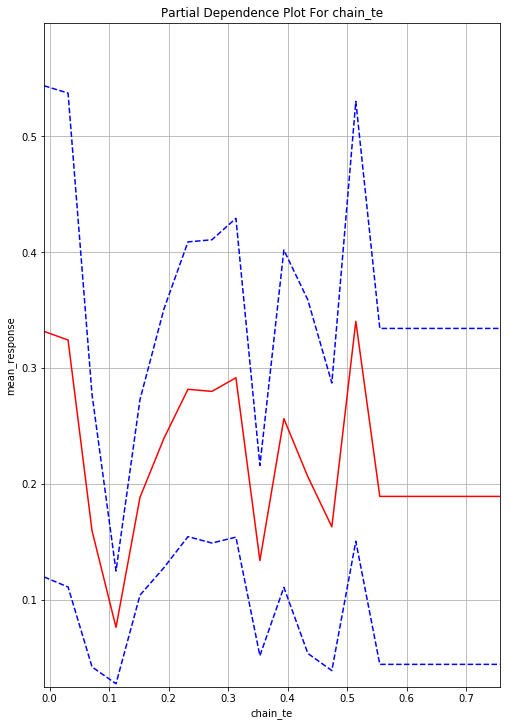

In [90]:
par_dep_offerval = gbm_model.partial_plot(data=test, cols=['chain_te'], server=True, plot=True)

In [95]:
print(nn_model.auc(train=True))

0.6945308003530786


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


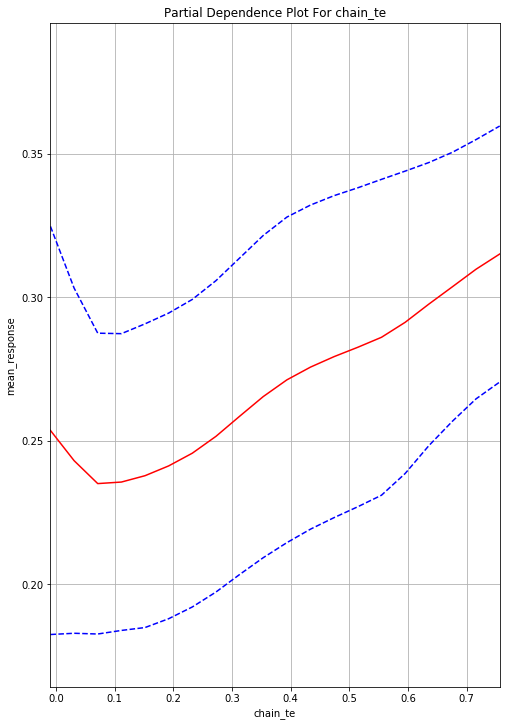

In [93]:
par_dep_offerval_nn = nn_model.partial_plot(data=test, cols=['chain_te'], server=True, plot=True)